In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os

In [2]:
# Used https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
def positionalEncoding(seq_len, d, n=10000):
    p = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            p[k, 2*i] = np.sin(k/denominator)
            p[k, 2*i+1] = np.cos(k/denominator)
    return p

In [3]:
# Generate EG3D Images
from eg3d import EG3D
device = 'cuda'
model_path = 'eg3d/eg3d_model/ffhqrebalanced512-128.pkl'

eg3d = EG3D(model_path, device)

In [4]:
latent_vector = torch.randn([1, 512])
img = eg3d.generate_imgs(latent_vector)


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


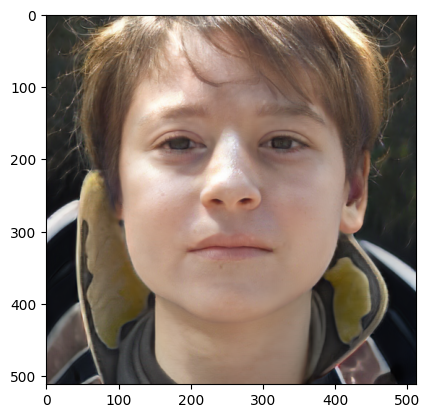

1.0


In [5]:
cpu_img = img[0]
plt.imshow(cpu_img)
plt.show()

print(np.amax(cpu_img[0]))